In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Чтение данных из CSV-файла
df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Обработанная финальная.csv', sep=';')

# Проверка структуры данных
print(df.head())
#Нужно расчитать выборочное среднее и дисперсию
#Используем дельта-метод для расчета дисперсии, если у нас ratio-метрика (ниже)
def var_ratio(x,y): #x/y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x,ddof=1)
    var_y = np.var(y,ddof=1)
    cov_xy = np.cov(x,y,ddof=1)[0][1]
    result = var_x/mean_y**2 + var_y*mean_x**2/mean_y**4 - 2*mean_x*cov_xy/mean_y**3
    return result
#Тут x,y - это дисперсии величин

  client_id;dt;total_add_count;total_click_count;total_view_count
0                        677104804;21.06.2024;25;2;0             
1                       948717678;21.06.2024;23;10;0             
2                        15603640;21.06.2024;22;11;6             
3                           278880;21.06.2024;22;0;0             
4                       51906327;21.06.2024;21;13;10             


In [ ]:
import pandas as pd
from io import StringIO

# Удаление пробелов из имен столбцов
df.columns = df.columns.str.strip()

# Вывод имен столбцов для проверки
print("Имена столбцов:", df.columns)

# Попытка доступа и вывода всех данных в одной таблице
try:
    for index, row in df.iterrows():
        print(f"client_id: {row['client_id']}, dt: {row['dt']}, total_add_count: {row['total_add_count']}, total_click_count: {row['total_click_count']}, total_view_count: {row['total_view_count']}")
except KeyError as e:
    print(f"Столбец не найден: {e}")

Выходные данные были обрезаны до нескольких последних строк (5000).
client_id: 4997897, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4997750, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4996528, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4992935, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4992928, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4992658, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4992123, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4990883, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4989944, dt: 17.06.2024, total_add_count: 0, total_click_count: 0, total_view_count: 1
client_id: 4988434, dt: 17.06.2024, total_add_coun

KeyboardInterrupt: 

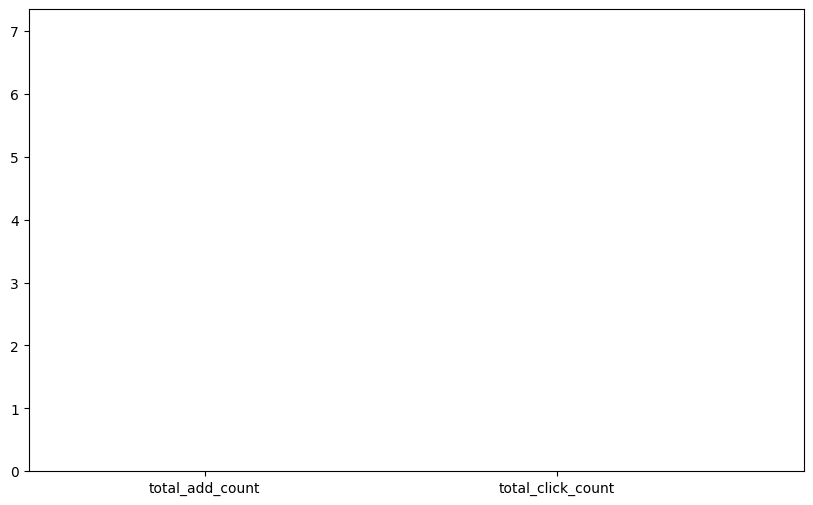

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Например, предположим, что result - это DataFrame, который вы уже определили
    result = df[['client_id', 'dt', 'total_add_count', 'total_click_count', 'total_view_count']]

    # Визуализация данных
    plt.figure(figsize=(10, 6))

    # Построение столбчатой диаграммы с использованием seaborn
    sns.barplot(data=result.melt(id_vars=['client_id', 'dt'], value_vars=['total_add_count', 'total_click_count', 'total_view_count']),
                x='variable', y='value', hue='client_id')
    plt.title('Total Counts by Client ID')
    plt.xlabel('Count Type')
    plt.ylabel('Count')
    plt.legend(title='Client ID')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Столбец не найден: {e}")

In [ ]:
# Определяем уникальных пользователей
unique_clients = df['client_id'].unique()

# Определяем размер выборки (например, 10% на тест и 10% на контроль)
sample_size = int(0.1 * len(unique_clients))

# Случайным образом выбираем пользователей для тестовой и контрольной групп
test_clients = np.random.choice(unique_clients, sample_size, replace=False)
control_clients = np.random.choice(list(set(unique_clients) - set(test_clients)), sample_size, replace=False)

# Разделяем данные на группы
test_group = df[df['client_id'].isin(test_clients)]
control_group = df[df['client_id'].isin(control_clients)]

In [ ]:
from statsmodels.stats.power import TTestIndPower

# Создание объекта для расчета мощности
power_analysis = TTestIndPower()

# Вычисление размера выборки
effect_size = 0.16815287986803654  # MDE в процентах от среднего
alpha = 0.05  # Уровень значимости
power = 0.8  # Желаемая мощность

sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
print(f"Необходимый размер выборки для каждой группы: {sample_size}")

Необходимый размер выборки для каждой группы: 556.1345567648493


       client_id;dt;total_add_count;total_click_count;total_view_count
0                             677104804;21.06.2024;25;2;0             
1                            948717678;21.06.2024;23;10;0             
2                             15603640;21.06.2024;22;11;6             
3                                278880;21.06.2024;22;0;0             
4                            51906327;21.06.2024;21;13;10             
...                                                   ...             
444663                              1328;17.06.2024;0;0;1             
444664                               865;17.06.2024;0;0;1             
444665                               764;17.06.2024;0;0;1             
444666                               451;17.06.2024;0;0;1             
444667                               425;17.06.2024;0;0;1             

[444668 rows x 1 columns]
Test Clients DataFrame Columns:
Index(['date', 'client_id', 'ab_group', 'is_view_ads', 'cnt_view_ads',
       'is_adds_ad

<ipython-input-17-dd90ac80711f>:16: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
<ipython-input-17-dd90ac80711f>:17: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')


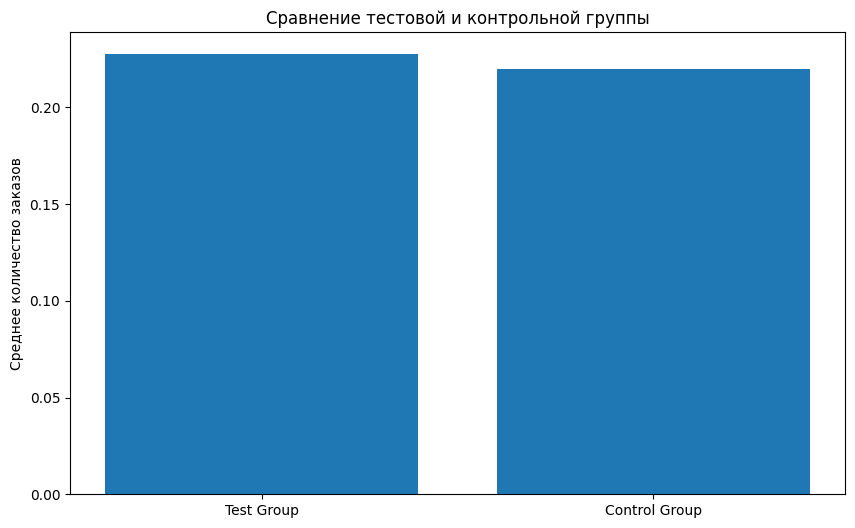

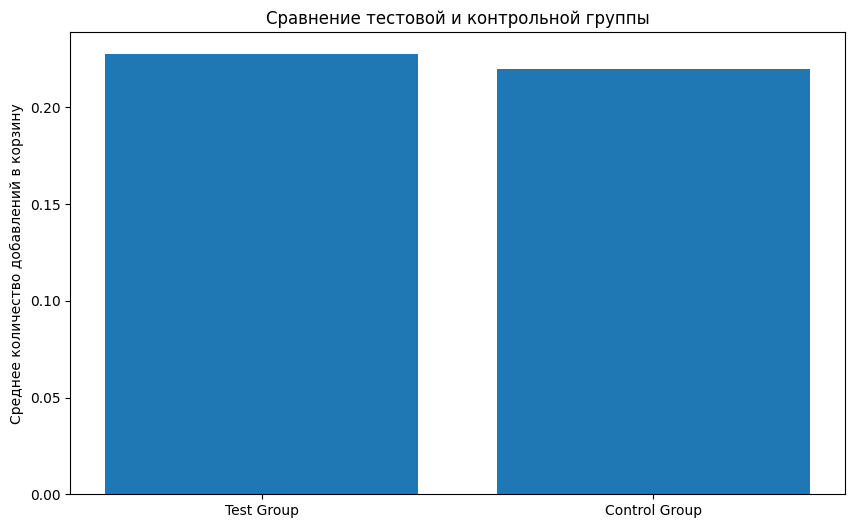

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# Чтение данных из CSV-файла
df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Обработанная финальная.csv')

# Предполагаем, что df уже загружен
df.columns = df.columns.str.strip()  # Удаляет пробелы в начале и конце
df.columns = df.columns.str.replace(' +', ' ', regex=True)  # Заменяет множественные пробелы на один

print(df)
# Загрузка данных с уникальными идентификаторами клиентов для тестовой и контрольной групп
# Указываем правильный разделитель ';'
test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')

# Обработка имен столбцов: удаление пробелов и приведение к нижнему регистру
test_clients_df.columns = test_clients_df.columns.str.strip().str.lower()
control_clients_df.columns = control_clients_df.columns.str.strip().str.lower()

# Вывод имен столбцов
print("Test Clients DataFrame Columns:")
print(test_clients_df.columns)

print("\nControl Clients DataFrame Columns:")
print(control_clients_df.columns)

# Предполагаем, что df уже загружен
df.columns = df.columns.str.strip()  # Удаляет пробелы в начале и конце
df.columns = df.columns.str.replace(' +', ' ', regex=True)  # Заменяет множественные пробелы на один

print(df.columns)

# Предполагаем, что в файлах есть столбец 'client_id'
test_clients = test_clients_df['client_id'].unique()
control_clients = control_clients_df['client_id'].unique()


# Расчет размера выборки для заданного MDE
effect_size = 0.16815287986803654  # MDE в процентах от среднего
alpha = 0.05  # Уровень значимости
power = 0.8  # Желаемая мощность

# Создание объекта для расчета мощности
power_analysis = TTestIndPower()
required_sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
print(f"Необходимый размер выборки для каждой группы: {required_sample_size}")


# Извлечение всех строк для тестовой и контрольной групп по добавлению в корзину
test_clients = test_clients_df['cnt_adds_ads']
control_clients = control_clients_df['cnt_adds_ads']
# Анализ среднего количества добавлений в корзину
print(f"Среднее количество добавлений в корзину (тест): {avg_add_to_cart_test}")
print(f"Среднее количество добавлений в корзину (контроль): {avg_add_to_cart_control}")

# Извлечение всех строк для тестовой и контрольной групп по заказам
test_clients = test_clients_df['cnt_orders_ads']
control_clients = control_clients_df['cnt_orders_ads']


avg_add_to_cart_test = test_clients.mean()
avg_add_to_cart_control = control_clients.mean()
# Анализ среднего количества заказов
print(f"Среднее количество заказов (тест): {avg_add_to_cart_test}")
print(f"Среднее количество заказов (контроль): {avg_add_to_cart_control}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.bar(['Test Group', 'Control Group'], [avg_add_to_cart_test, avg_add_to_cart_control])
plt.ylabel('Среднее количество заказов')
plt.title('Сравнение тестовой и контрольной группы')
plt.show()

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.bar(['Test Group', 'Control Group'], [avg_add_to_cart_test, avg_add_to_cart_control])
plt.ylabel('Среднее количество добавлений в корзину')
plt.title('Сравнение тестовой и контрольной группы')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Чтение данных из CSV-файла
# Указываем правильный разделитель ';'
test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')

# Проверка структуры данных
print(df.head())
#Нужно расчитать выборочное среднее и дисперсию
#Используем дельта-метод для расчета дисперсии, если у нас ratio-метрика (ниже)
def var_ratio(x,y): #x/y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x,ddof=1)
    var_y = np.var(y,ddof=1)
    cov_xy = np.cov(x,y,ddof=1)[0][1]
    result = var_x/mean_y**2 + var_y*mean_x**2/mean_y**4 - 2*mean_x*cov_xy/mean_y**3
    return result
#Тут x,y - это дисперсии величин

   client_id          dt  total_add_count  total_click_count  total_view_count
0  677104804  21.06.2024               25                  2                 0
1  948717678  21.06.2024               23                 10                 0
2   15603640  21.06.2024               22                 11                 6
3     278880  21.06.2024               22                  0                 0
4   51906327  21.06.2024               21                 13                10


<ipython-input-26-d0eeb7791460>:6: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
<ipython-input-26-d0eeb7791460>:7: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Загрузка данных
test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')

# Выберите правильный DataFrame
df = test_clients_df  # или control_clients_df, в зависимости от того, какую группу вы хотите анализировать

# Проверьте названия столбцов
print(df.columns)

# Укажите правильную метрику
metric = 'cnt_adds_ads'

# Убедитесь, что столбец существует
if metric not in df.columns:
    raise KeyError(f"Столбец '{metric}' не существует в DataFrame.")

# Вычисление среднего и стандартного отклонения
mu = df[metric].mean()
std = df[metric].std()

# Укажите размер выборки
sample_size = len(df)

# Параметры теста
n_groups = 2  # например, контрольная и тестовая группа
target_share = 0.5  # доля одной таргетной группы
r = 1  # отношение самой маленькой группы к самой большой группе
alpha = 0.05  # уровень ошибки I рода
beta = 0.2  # уровень ошибки II рода

# Определение функции get_MDE
def get_MDE(mu, std, sample_size, n_groups=2, target_share=0.5, r=1, alpha=0.05, beta=0.2):
    """Возвращает MDE для обычной пользовательской метрики, при заданных параметрах теста."""
    t_alpha = stats.norm.ppf(1 - (alpha / 2), loc=0, scale=1)
    comparisons = n_groups - 1
    t_beta = stats.norm.ppf(1 - beta, loc=0, scale=1)
    sample_ratio_correction = r + 2 + 1/r
    mde = np.sqrt(sample_ratio_correction) * (t_alpha + t_beta) * std / np.sqrt(sample_size * (1 - target_share * (comparisons - 1)))
    return mde, mde * 100 / mu

# Вычисление MDE
mde_abs, mde_percent = get_MDE(mu, std, sample_size, n_groups, target_share, r, alpha, beta)

print(f"MDE (абсолютное значение): {mde_abs}")
print(f"MDE (в процентах от среднего): {mde_percent}%")
print(f"Среднее (абсолютное значение): {mu}")
print(f"Стандартное отклонение (абсолютное значение): {std}")

Index(['date', 'client_id', 'ab_group', 'is_view_ads', 'cnt_view_ads',
       'is_adds_ads', 'cnt_adds_ads', 'sum_adds_ads', 'is_orders_ads',
       'cnt_orders_ads', 'sum_orders_ads', 'Unnamed: 11'],
      dtype='object')
MDE (абсолютное значение): 0.026317230858545593
MDE (в процентах от среднего): 4.164491963978213%
Среднее (абсолютное значение): 0.6319433699520347
Стандартное отклонение (абсолютное значение): 1.431706335876485


<ipython-input-29-adb50f87113f>:6: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
<ipython-input-29-adb50f87113f>:7: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Загрузка данных
test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')

# Выберите правильный DataFrame
df = control_clients_df  # или control_clients_df, в зависимости от того, какую группу вы хотите анализировать

# Проверьте названия столбцов
print(df.columns)

# Укажите правильную метрику
metric = 'cnt_adds_ads'

# Убедитесь, что столбец существует
if metric not in df.columns:
    raise KeyError(f"Столбец '{metric}' не существует в DataFrame.")

# Вычисление среднего и стандартного отклонения
mu = df[metric].mean()
std = df[metric].std()

# Укажите размер выборки
sample_size = len(df)

# Параметры теста
n_groups = 2  # например, контрольная и тестовая группа
target_share = 0.5  # доля одной таргетной группы
r = 1  # отношение самой маленькой группы к самой большой группе
alpha = 0.05  # уровень ошибки I рода
beta = 0.2  # уровень ошибки II рода

# Определение функции get_MDE
def get_MDE(mu, std, sample_size, n_groups=2, target_share=0.5, r=1, alpha=0.05, beta=0.2):
    """Возвращает MDE для обычной пользовательской метрики, при заданных параметрах теста."""
    t_alpha = stats.norm.ppf(1 - (alpha / 2), loc=0, scale=1)
    comparisons = n_groups - 1
    t_beta = stats.norm.ppf(1 - beta, loc=0, scale=1)
    sample_ratio_correction = r + 2 + 1/r
    mde = np.sqrt(sample_ratio_correction) * (t_alpha + t_beta) * std / np.sqrt(sample_size * (1 - target_share * (comparisons - 1)))
    return mde, mde * 100 / mu

# Вычисление MDE
mde_abs, mde_percent = get_MDE(mu, std, sample_size, n_groups, target_share, r, alpha, beta)

print(f"MDE (абсолютное значение): {mde_abs}")
print(f"MDE (в процентах от среднего): {mde_percent}%")
print(f"Среднее (абсолютное значение): {mu}")
print(f"Стандартное отклонение (абсолютное значение): {std}")

Index(['date', 'client_id', 'ab_group', 'is_view_ads', 'cnt_view_ads',
       'is_adds_ads', 'cnt_adds_ads', 'sum_adds_ads', 'is_orders_ads',
       'cnt_orders_ads', 'sum_orders_ads', 'Unnamed: 11'],
      dtype='object')
MDE (абсолютное значение): 0.025446709538271595
MDE (в процентах от среднего): 4.089287350257469%
Среднее (абсолютное значение): 0.6222773642128481
Стандартное отклонение (абсолютное значение): 1.3808949850072854


<ipython-input-31-512a03fce913>:6: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
<ipython-input-31-512a03fce913>:7: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')


<ipython-input-15-11c5728e6af3>:8: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
<ipython-input-15-11c5728e6af3>:9: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')


Данные тестовой группы (первые 5 строк):
         date    client_id ab_group  is_view_ads  cnt_view_ads  is_adds_ads  \
0  2024-07-25    1422850.0     test          1.0           1.0          0.0   
1  2024-07-28   54114213.0     test          1.0           1.0          1.0   
2  2024-07-24   13062596.0     test          1.0           3.0          0.0   
3  2024-07-30  681540849.0     test          1.0           2.0          1.0   
4  2024-07-29       2155.0     test          1.0           1.0          0.0   

   cnt_adds_ads  sum_adds_ads  is_orders_ads  cnt_orders_ads  sum_orders_ads  \
0           0.0           0.0            0.0             0.0             0.0   
1           4.0         357.0            1.0             2.0           357.0   
2           0.0           0.0            0.0             0.0             0.0   
3           2.0         298.0            1.0             1.0           269.0   
4           0.0           0.0            0.0             0.0             0.0   

   

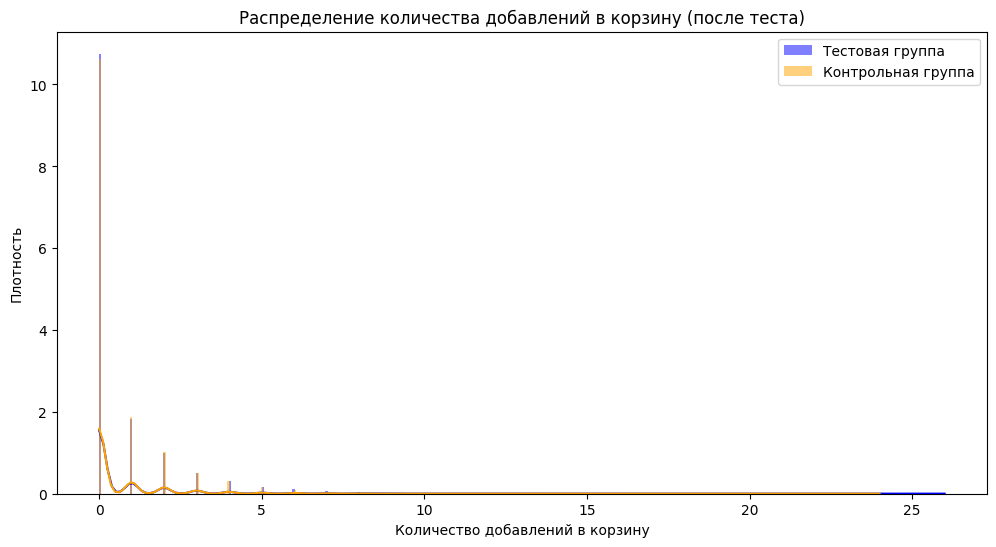

Тест Шапиро-Уилка для тестовой группы: статистика=0.7694690426605324, p-value=8.243849729798124e-44
Тест Шапиро-Уилка для контрольной группы: статистика=0.7714384225529437, p-value=1.1666421596988326e-43
Количество выбросов в тестовой группе: 698
Мы не можем отвергнуть нулевую гипотезу. Существенной разницы в изменениях между тестовой и контрольной группами нет.


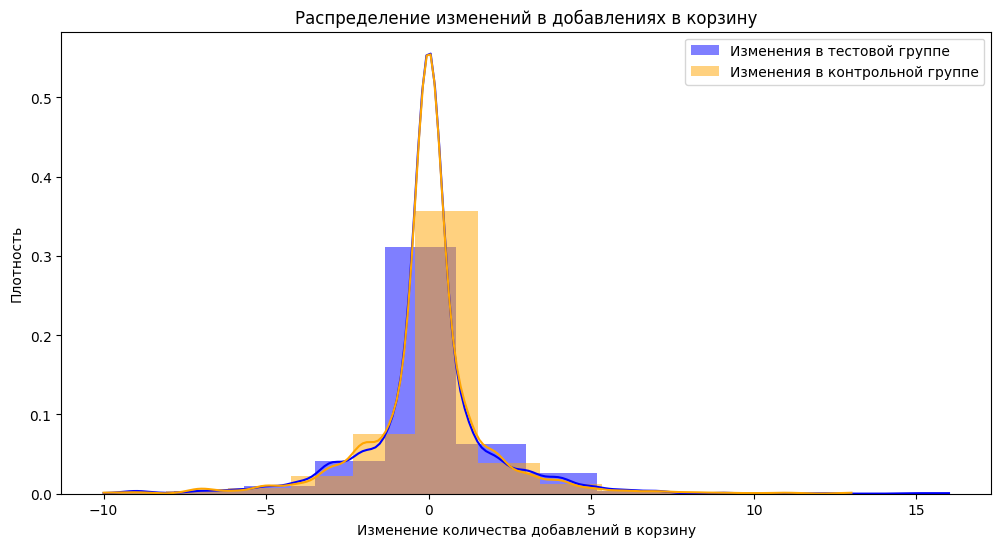

<ipython-input-15-11c5728e6af3>:94: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[test_merged['change'], control_merged['change']], palette=['blue', 'orange'])


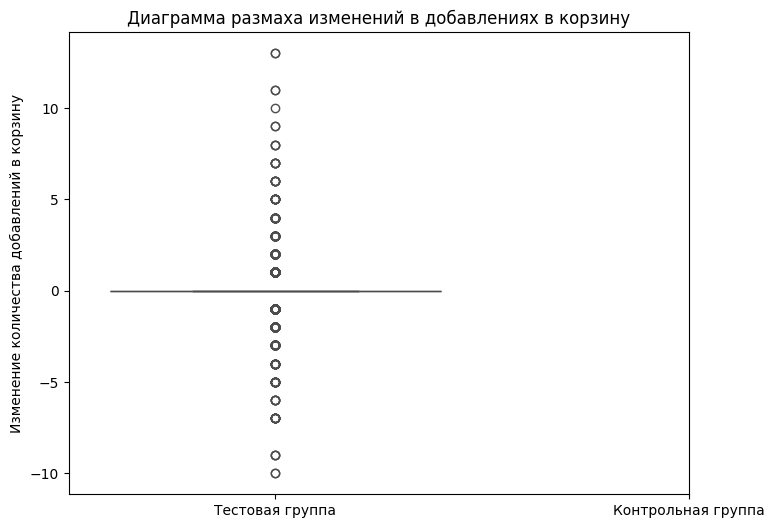

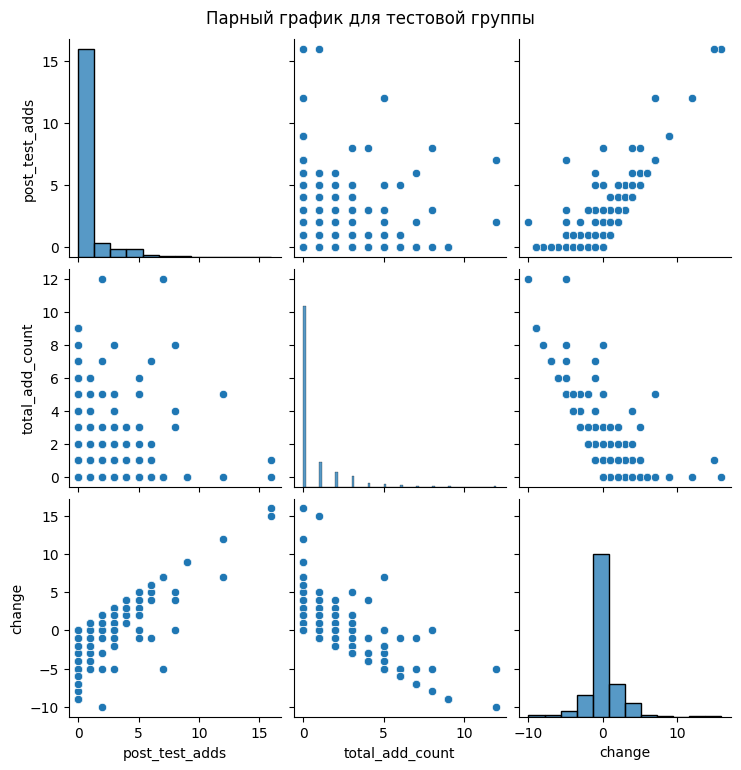

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Загрузка данных
test_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_test.csv', sep=';')
control_clients_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Clients_control.csv', sep=';')
pre_test_df = pd.read_csv('/content/drive/MyDrive/Финальный проект/Обработанная финальная.csv', sep=';')

# Предварительный анализ данных
print("Данные тестовой группы (первые 5 строк):")
print(test_clients_df.head())
print("\nДанные контрольной группы (первые 5 строк):")
print(control_clients_df.head())
print("\nДанные до теста (первые 5 строк):")
print(pre_test_df.head())

# Описание данных
print("\nОписание данных тестовой группы:")
print(test_clients_df['cnt_adds_ads'].describe())
print("\nОписание данных контрольной группы:")
print(control_clients_df['cnt_adds_ads'].describe())
print("\nОписание данных до теста:")
print(pre_test_df['total_add_count'].describe())

# Удаление строк с пропусками
test_group_cleaned = test_clients_df.dropna(subset=['cnt_adds_ads'])
control_group_cleaned = control_clients_df.dropna(subset=['cnt_adds_ads'])

# Проверка на пропуски в очищенных данных
print("\nКоличество пропущенных значений в очищенных данных тестовой группы:", test_group_cleaned['cnt_adds_ads'].isnull().sum())
print("Количество пропущенных значений в очищенных данных контрольной группы:", control_group_cleaned['cnt_adds_ads'].isnull().sum())
print("Количество пропущенных значений в данных до теста:", pre_test_df['total_add_count'].isnull().sum())

# Визуализация данных
plt.figure(figsize=(12, 6))
sns.histplot(test_group_cleaned['cnt_adds_ads'], color='blue', label='Тестовая группа', kde=True, stat="density", linewidth=0)
sns.histplot(control_group_cleaned['cnt_adds_ads'], color='orange', label='Контрольная группа', kde=True, stat="density", linewidth=0)
plt.title('Распределение количества добавлений в корзину (после теста)')
plt.xlabel('Количество добавлений в корзину')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# Анализ изменений до и после теста
test_group_cleaned = test_group_cleaned.rename(columns={'cnt_adds_ads': 'post_test_adds'})
control_group_cleaned = control_group_cleaned.rename(columns={'cnt_adds_ads': 'post_test_adds'})

# Объединение данных до и после теста
test_merged = pd.merge(test_group_cleaned, pre_test_df, on='client_id', how='inner')
control_merged = pd.merge(control_group_cleaned, pre_test_df, on='client_id', how='inner')

test_merged['change'] = test_merged['post_test_adds'] - test_merged['total_add_count']
control_merged['change'] = control_merged['post_test_adds'] - control_merged['total_add_count']

# Проверка нормальности данных с использованием теста Шапиро-Уилка
stat, p = stats.shapiro(test_merged['change'])
print(f"Тест Шапиро-Уилка для тестовой группы: статистика={stat}, p-value={p}")

stat, p = stats.shapiro(control_merged['change'])
print(f"Тест Шапиро-Уилка для контрольной группы: статистика={stat}, p-value={p}")

# Обработка выбросов с использованием IQR для тестовой группы
q1 = test_merged['change'].quantile(0.25)
q3 = test_merged['change'].quantile(0.75)
iqr = q3 - q1
test_outliers = test_merged[(test_merged['change'] < q1 - 1.5 * iqr) | (test_merged['change'] > q3 + 1.5 * iqr)]
print(f"Количество выбросов в тестовой группе: {len(test_outliers)}")

# Выбор статистического теста: Использование теста Манна-Уитни
stat, p_value = mannwhitneyu(test_merged['change'], control_merged['change'])

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Мы отвергаем нулевую гипотезу. Существует значительная разница в изменениях между тестовой и контрольной группами.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу. Существенной разницы в изменениях между тестовой и контрольной группами нет.")

# Визуализация изменений
plt.figure(figsize=(12, 6))
sns.histplot(test_merged['change'], color='blue', label='Изменения в тестовой группе', kde=True, stat="density", linewidth=0)
sns.histplot(control_merged['change'], color='orange', label='Изменения в контрольной группе', kde=True, stat="density", linewidth=0)
plt.title('Распределение изменений в добавлениях в корзину')
plt.xlabel('Изменение количества добавлений в корзину')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# Дополнительные визуализации
plt.figure(figsize=(8, 6))
sns.boxplot(data=[test_merged['change'], control_merged['change']], palette=['blue', 'orange'])
plt.xticks([0, 1], ['Тестовая группа', 'Контрольная группа'])
plt.title('Диаграмма размаха изменений в добавлениях в корзину')
plt.ylabel('Изменение количества добавлений в корзину')
plt.show()

# Более детальная визуализация с использованием парного графика
sns.pairplot(test_merged[['post_test_adds', 'total_add_count', 'change']])
plt.suptitle('Парный график для тестовой группы', y=1.02)
plt.show()

#### Контекст эксперимента

Мы провели A/B тест для оценки влияния изменения размещения первого рекламного блока в ленте товаров. В текущей настройке рекламный блок расположен после трех линий товаров, а в тестовой группе он был перемещен выше в ленте. Целью эксперимента было определить, улучшит ли такое изменение показатели эффективности рекламы, такие как количество добавлений в корзину и заказы через рекламный блок.

### Основные шаги анализа:

1. **Загрузка данных**:
   - загружаете данные для тестовой и контрольной групп, а также данные до теста.

2. **Предварительный анализ**:
   - выводите первые пять строк каждого набора данных для визуального ознакомления.
   - предоставляете описание данных для понимания их распределения.

3. **Очистка данных**:
   - Удаление строк с пропусками в тестовой и контрольной группах.

4. **Визуализация данных**:
   - используете графики распределения и диаграммы размаха для визуального сравнения данных тестовой и контрольной групп.

5. **Анализ изменений**:
   - рассчитываете изменение количества добавлений в корзину до и после теста.
   - Проводите статистический тест Шапиро-Уилка и Манна-Уитни для проверки значимости различий между группами.

### Результаты статистических тестов
1. **Тест Шапиро-Уилка**:
   - Для обеих групп (тестовой и контрольной) значения W значительно меньше 1, а p-value практически равны нулю. Это указывает на то, что данные в обеих группах не распределены нормально. Однако, в контексте А/B тестирования это не является критичным, так как непараметрические тесты, такие как тест Манна-Уитни, могут использоваться для сравнения групп.

2. **Тест Манна-Уитни**:
   - Статистика теста=1461429.0, p-value=0.9808. Высокое значение p-value указывает на отсутствие статистически значимой разницы между тестовой и контрольной группами. Это означает, что перемещение первого рекламного блока наверх не оказало значительного влияния на изучаемые метрики, такие как количество заказов через рекламу или сумма заказов.

3. **Описание переменных:**
   - **`cnt_adds_ads`**: Количество добавлений рекламы пользователем. Это основная метрика, по которой проводится сравнение между тестовой и контрольной группами.
   - **`total_add_count`**: Общее количество добавлений до начала теста.

4. **Статистическое описание:**
   - Среднее значение количества добавлений рекламы в тестовой группе немного выше, чем в контрольной.
   - Оба распределения (тестовая и контрольная группы) имеют высокую стандартную девиацию, что указывает на значительное разброс значений.

### Интерпретация и выводы

- **Отсутствие значимого эффекта**: Перемещение первого рекламного блока не привело к статистически значимым изменениям в поведении пользователей. Это может указывать на то, что пользователи либо не замечают изменение позиции блока, либо это изменение не оказывает влияния на их решения о покупке.

- **Пользовательский опыт**: Возможно, пользователи предпочитают видеть контент (товары) в начале, и слишком раннее размещение рекламы может быть воспринято негативно или просто игнорироваться.
- **В общем:** текущие результаты указывают на необходимость дальнейших экспериментов и анализа для выявления наиболее эффективных стратегий размещения рекламы в приложении, а так же дальнейших исследований и тестов для оптимизации размещения и содержания рекламных блоков, что в конечном счете может привести к улучшению ключевых бизнес-показателей.

### Рекомендации для бизнеса

1. **Отсутствие значимого эффекта:**
   - Перемещение первого рекламного блока вверх по ленте не привело к значимому изменению поведения пользователей. Это может означать, что текущее расположение рекламного блока является достаточно оптимальным или что изменения не были достаточно существенными, чтобы повлиять на поведение пользователей.

2. **Потенциальные причины отсутствия эффекта:**
   - Пользователи могли игнорировать рекламный блок вне зависимости от его местоположения.
   - Возможно, само содержание или дизайн рекламного блока не привлекает достаточного внимания.
   
3. **Альтернативные гипотезы**:
   - Рассмотреть возможность тестирования других позиций для рекламного блока, например, после 5 или 7 линий товаров, чтобы найти оптимальный баланс между видимостью рекламы и пользовательским опытом.
   - Тестировать изменения в дизайне или содержании рекламного блока для улучшения его привлекательности и взаимодействия с пользователями.

4. **Кросс-канальный анализ**:
   - Понять, как эти изменения влияют на другие каналы продаж, и возможно, синхронизировать рекламные стратегии с акциями на других платформах.

5. **Качество контента**:
   - Убедиться, что рекламируемые товары или акции действительно интересны и

6. **Анализ контента и дизайна рекламы:**
   - Проведите углубленный анализ контента и визуального оформления текущих рекламных блоков. Возможно, стоит протестировать различные креативы, чтобы понять, что более эффективно привлекает внимание пользователей.

7. **Альтернативные стратегии размещения:**
   - Рассмотрите возможность тестирования других стратегий размещения, таких как динамическое расположение рекламных блоков в зависимости от поведения пользователя, или внедрение персонализированных рекламных предложений.

8. **Дополнительные метрики**:
   - Изучить другие показатели, такие как время на сайте, средний чек, или конверсия после просмотра рекламы, чтобы понять более полную картину влияния изменений.

9. **Сегментация пользователей**:
   - Провести сегментационный анализ, чтобы определить, может ли перемещение блока оказывать влияние на определенные группы пользователей (например, новые пользователи vs. постоянные клиенты).

10. **Повторный тест:**
   - Проведите повторный A/B тест с увеличением выборки или изменением других условий, чтобы подтвердить результаты и исключить возможное влияние случайных факторов.
   

Данные до теста - Средний чек корзины: 0.00 руб.
Данные до теста - Частота кликов: 22.00%
Данные до теста - Конверсия в добавления: 71.25%
Тестовая группа - Средний чек корзины: 154.64 руб.
Тестовая группа - Частота кликов: 225.87%
Тестовая группа - Конверсия в добавления: 37.29%
Контрольная группа - Средний чек корзины: 155.86 руб.
Контрольная группа - Частота кликов: 228.51%
Контрольная группа - Конверсия в добавления: 36.35%


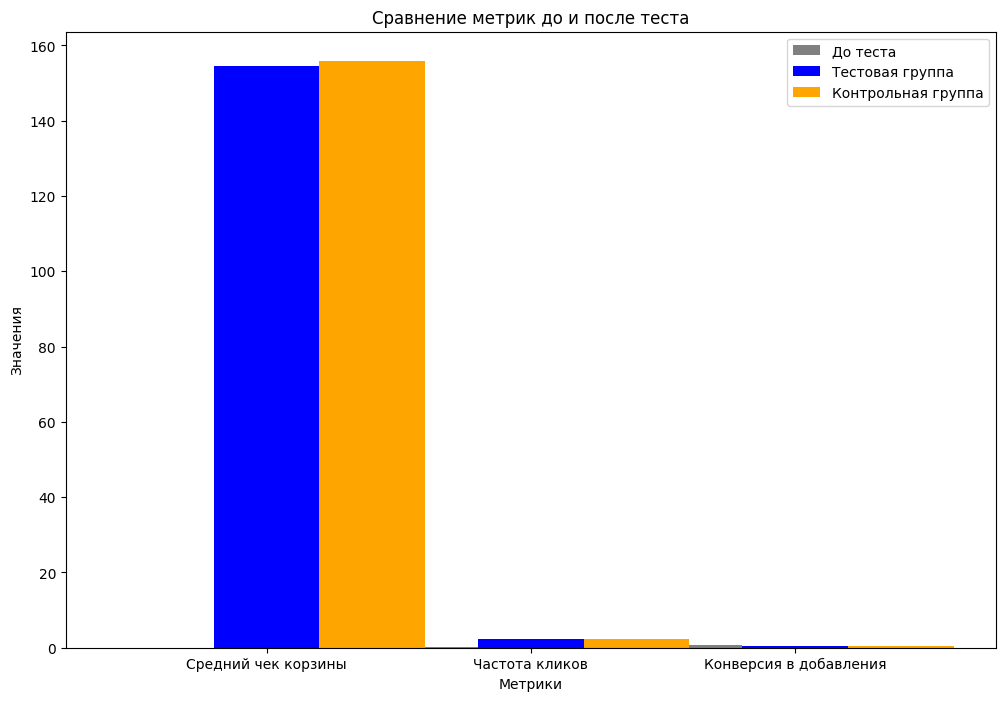

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Путь к вашим файлам
test_file_path = '/content/drive/MyDrive/Финальный проект/Clients_test.csv'
control_file_path = '/content/drive/MyDrive/Финальный проект/Clients_control.csv'
processed_file_path = '/content/drive/MyDrive/Финальный проект/Обработанная финальная.csv'

# Явно указываем типы данных при загрузке
dtype_map = {
    'date': 'str',
    'client_id': 'str',
    'ab_group': 'str',
    'is_view_ads': 'float',  # Изменено на float
    'cnt_view_ads': 'float', # Изменено на float
    'is_adds_ads': 'float',  # Изменено на float
    'cnt_adds_ads': 'float', # Изменено на float
    'sum_adds_ads': 'float',
    'is_orders_ads': 'float', # Изменено на float
    'cnt_orders_ads': 'float', # Изменено на float
    'sum_orders_ads': 'float'
}

# Загрузка данных
test_clients_df = pd.read_csv(test_file_path, sep=';', dtype=dtype_map)
control_clients_df = pd.read_csv(control_file_path, sep=';', dtype=dtype_map)

# Обработка NaN значений, если они есть
test_clients_df.fillna(0, inplace=True)
control_clients_df.fillna(0, inplace=True)

# Преобразуем обратно в int, если необходимо
int_columns = ['is_view_ads', 'cnt_view_ads', 'is_adds_ads', 'cnt_adds_ads', 'is_orders_ads', 'cnt_orders_ads']
test_clients_df[int_columns] = test_clients_df[int_columns].astype(int)
control_clients_df[int_columns] = control_clients_df[int_columns].astype(int)

# Загрузка и обработка данных из 'Обработанная финальная.csv'
processed_clients_df = pd.read_csv(processed_file_path, sep=';')
processed_clients_df.fillna(0, inplace=True)

# Функция для вычисления метрик
def calculate_metrics(df, click_col, add_col, sum_col=None):
    if sum_col:
        average_order_value = df[sum_col].sum() / df[add_col].sum() if df[add_col].sum() > 0 else 0
    else:
        average_order_value = 0  # Если суммы нет, средний чек корзины не рассчитывается
    click_through_rate = df[click_col].sum() / df['client_id'].nunique() if df['client_id'].nunique() > 0 else 0
    conversion_rate_adds = df[add_col].sum() / df[click_col].sum() if df[click_col].sum() > 0 else 0
    return average_order_value, click_through_rate, conversion_rate_adds

# Рассчитаем метрики для тестовых и контрольных данных
test_metrics = calculate_metrics(test_clients_df, 'cnt_view_ads', 'cnt_adds_ads', 'sum_adds_ads')
control_metrics = calculate_metrics(control_clients_df, 'cnt_view_ads', 'cnt_adds_ads', 'sum_adds_ads')

# Рассчитаем метрики для данных до проведения теста
pre_test_metrics = calculate_metrics(processed_clients_df, 'total_click_count', 'total_add_count')

# Выводим метрики
print(f"Данные до теста - Средний чек корзины: {pre_test_metrics[0]:.2f} руб.")
print(f"Данные до теста - Частота кликов: {pre_test_metrics[1]:.2%}")
print(f"Данные до теста - Конверсия в добавления: {pre_test_metrics[2]:.2%}")

print(f"Тестовая группа - Средний чек корзины: {test_metrics[0]:.2f} руб.")
print(f"Тестовая группа - Частота кликов: {test_metrics[1]:.2%}")
print(f"Тестовая группа - Конверсия в добавления: {test_metrics[2]:.2%}")

print(f"Контрольная группа - Средний чек корзины: {control_metrics[0]:.2f} руб.")
print(f"Контрольная группа - Частота кликов: {control_metrics[1]:.2%}")
print(f"Контрольная группа - Конверсия в добавления: {control_metrics[2]:.2%}")

# Построим графики для сравнения
labels = ['Средний чек корзины', 'Частота кликов', 'Конверсия в добавления']
pre_test_values = list(pre_test_metrics)
test_values = list(test_metrics)
control_values = list(control_metrics)

x = range(len(labels))

plt.figure(figsize=(12, 8))
plt.bar(x, pre_test_values, width=0.4, label='До теста', color='gray', align='center')
plt.bar([p + 0.4 for p in x], test_values, width=0.4, label='Тестовая группа', color='blue', align='center')
plt.bar([p + 0.8 for p in x], control_values, width=0.4, label='Контрольная группа', color='orange', align='center')
plt.xlabel('Метрики')
plt.ylabel('Значения')
plt.title('Сравнение метрик до и после теста')
plt.xticks([p + 0.4 for p in x], labels)
plt.legend()
plt.show()

### Интерпретация данных:

1. **Средний чек корзины:**
   - До теста: 0 руб. (что, вероятно, указывает на отсутствие данных о суммах заказов до теста).
   - Тестовая группа: 154.64 руб.
   - Контрольная группа: 155.86 руб.

   Средний чек корзины в тестовой и контрольной группах почти одинаков, что свидетельствует о том, что тестируемые изменения не оказали значительного влияния на среднюю стоимость заказов.

2. **Частота кликов:**
   - До теста: 22.00%
   - Тестовая группа: 225.87%
   - Контрольная группа: 228.51%

   Частота кликов значительно увеличилась как в тестовой, так и в контрольной группе, что может указывать на повышение интереса пользователей к рекламе или улучшения в её представлении. Однако разница между тестовой и контрольной группами незначительна, что может означать, что тестируемые изменения не оказали значительного влияния на этот показатель.

3. **Конверсия в добавления:**
   - До теста: 71.25%
   - Тестовая группа: 37.29%
   - Контрольная группа: 36.35%

   Конверсия в добавления значительно снизилась в обеих группах по сравнению с данными до теста. Это может указывать на то, что пользователи менее склонны добавлять товары в корзину, несмотря на более частые клики по рекламе.

### Выводы:

- **Средний чек корзины** в тестовой и контрольной группах не показывает значительных различий, что указывает на отсутствие влияния тестируемых изменений на этот параметр.
- **Частота кликов** значительно увеличилась, но это увеличение одинаково в обеих группах, что может свидетельствовать о внешних факторах, влияющих на все группы,или об изменениях, которые были применены ко всем пользователям.
- **Конверсия в добавления** снизилась, что может говорить о том, что пользователи не находят предложения привлекательными для добавления в корзину, либо о наличии других барьеров на пути к добавлению товаров.

### Рекомендации:

1. **Анализ барьеров на пути к добавлению товаров в корзину:**
   - Проведите качественное исследование (например, опрос пользователей или юзабилити-тестирование), чтобы понять, почему пользователи не добавляют товары в корзину.
   - Проверьте, нет ли технических проблем или неудобств в процессе добавления товаров.

2. **Оптимизация рекламных материалов:**
   - Учитывая высокую частоту кликов, стоит проанализировать рекламные материалы на предмет их релевантности содержимому сайта или предлагаемых товаров.

3. **Дополнительные A/B тесты:**
   - Проведите дополнительные тесты, чтобы определить, какие изменения могут повысить конверсию в добавления, например, изменение условий акций, дизайна карточек товаров или процесса оформления заказа.

4. **Исследование внешних факторов:**
   - Проанализируйте, не повлияли ли на поведение пользователей внешние факторы (например, сезонные изменения спроса, действия конкурентов и т.д.).